#### ライブラリのインストール

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [37]:
# Googleドライブのマウント
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


#### 基本ワークフロー

[Text(0.5, 1.0, 'Sample Plot'), Text(0.5, 0, 'x-axis'), Text(0, 0.5, 'y-axis')]

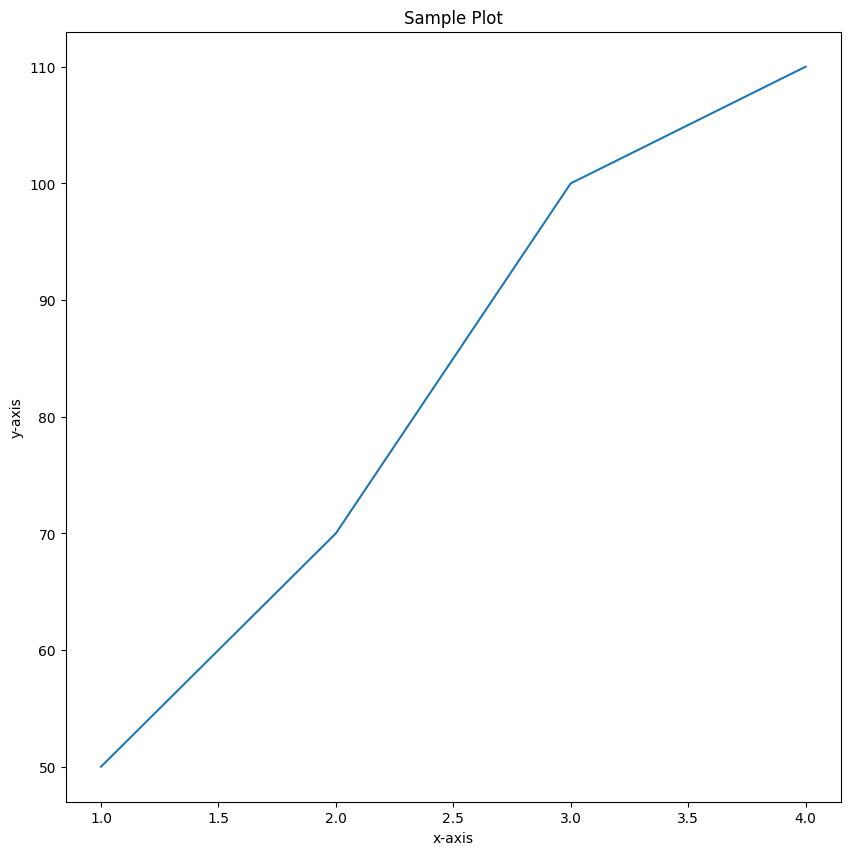

In [ ]:
# データの準備
x =[1, 2, 3, 4]
y = [50, 70, 100, 110]

# プロットのセットアップ
# plt.figure()：1つの図に1つのプロット
# plt.subplot()：1つの図に複数のプロット
fig, ax = plt.subplots(figsize=(10, 10))

# プロット
ax.plot(x, y)

# プロットのカスタマイズ
ax.set(title='Sample Plot', xlabel='x-axis', ylabel='y-axis')

# 保存
# fig.saveing("images/sample-plot.png")

#### 基本プロット

In [4]:
# データの準備
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

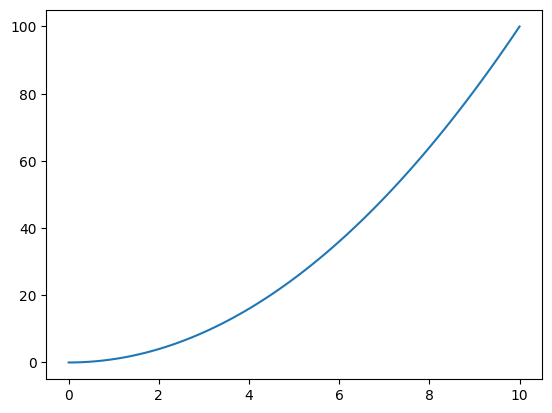

In [5]:
# 線形プロット
fig, ax = plt.subplots()
ax.plot(x, x**2)

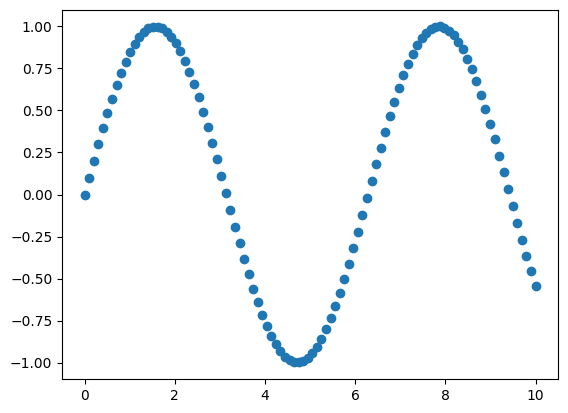

In [7]:
# 散布図
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x))

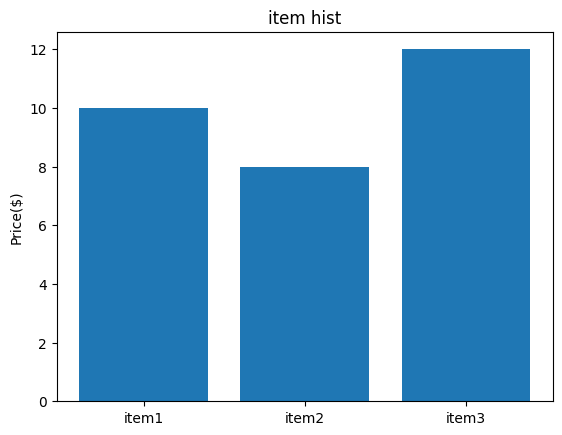

In [19]:
# ヒストグラム
item_prices = {"item1": 10, "item2": 8, "item3": 12}
fig, ax = plt.subplots()
ax.bar(item_prices.keys(), item_prices.values());
ax.set(title="item hist",
       ylabel="Price($)");

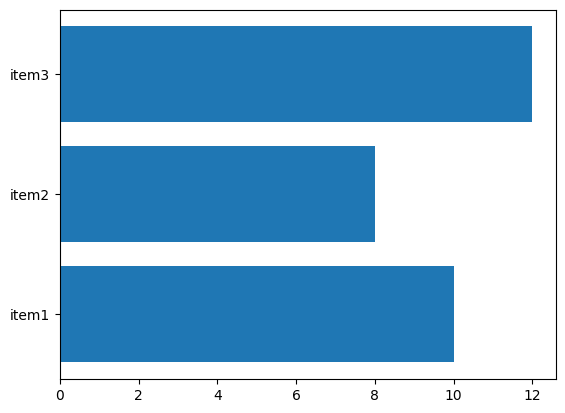

In [21]:
# ヒストグラム（横）
fig, ax = plt.subplots()
ax.barh(list(item_prices.keys()), list(item_prices.values()));

(array([  5.,  42.,  88., 168., 251., 234., 131.,  60.,  14.,   7.]),
 array([-2.91598103, -2.3004574 , -1.68493377, -1.06941014, -0.45388651,
         0.16163712,  0.77716075,  1.39268437,  2.008208  ,  2.62373163,
         3.23925526]),
 <BarContainer object of 10 artists>)

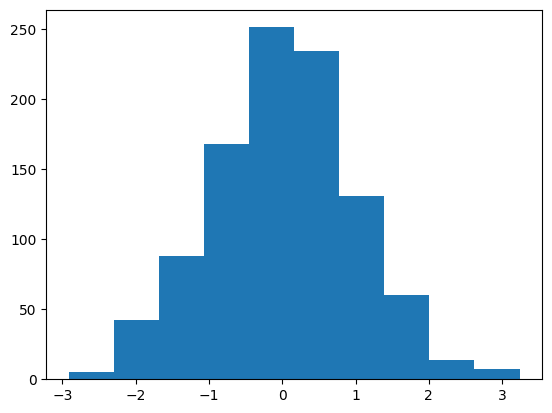

In [23]:
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x)

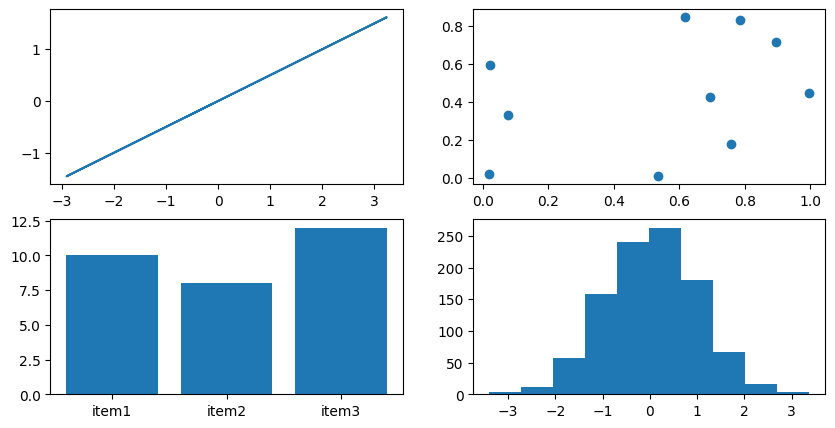

In [29]:
# subplotの描画方法①
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 5))
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(item_prices.keys(), item_prices.values());
ax4.hist(np.random.randn(1000));

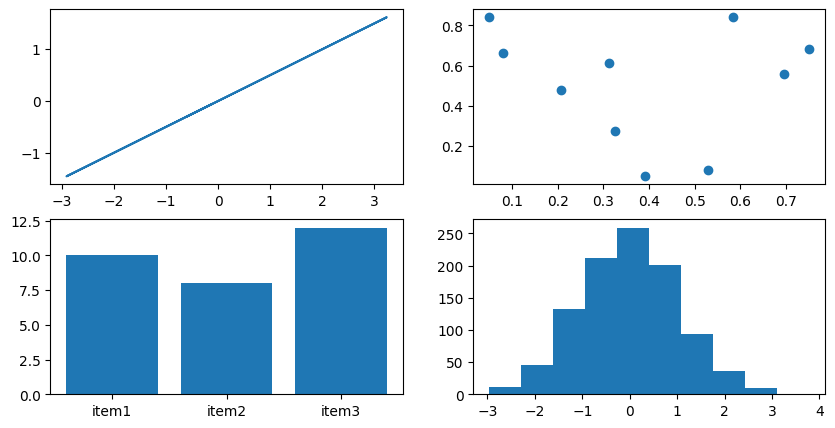

In [36]:
# subplotの描画方法①
fig, ax = plt.subplots(2, 2, figsize=(10, 5))
ax[0, 0].plot(x,x/2);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(item_prices.keys(), item_prices.values());
ax[1, 1].hist(np.random.randn(1000));

#### Matplotlib API

In [51]:
car_sales = pd.read_csv("/content/drive/MyDrive/data-analysis/sample/car-sales.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


<Axes: >

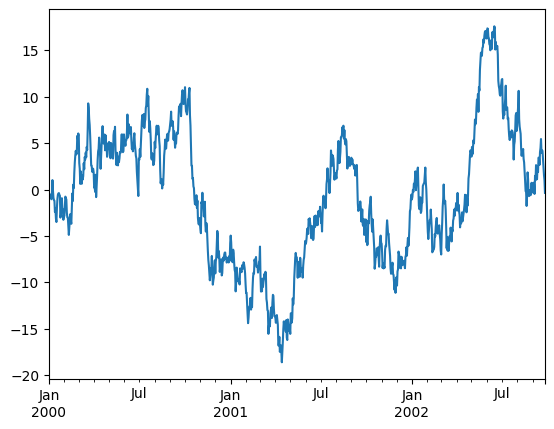

In [44]:
# 線形プロット
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

In [56]:
# オブジェクト型から数値型に変更（Priceの "$" の部分を変更）
car_sales['Price'] = car_sales['Price'].replace('[\$\,\.]', '', regex=True).astype(int)
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000


In [65]:
# strに戻して0を削除
car_sales["Price"] = car_sales["Price"].astype(str).str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,40
1,Honda,Red,87899,4,50
2,Toyota,Blue,32549,3,70
3,BMW,Black,11179,5,220
4,Nissan,White,213095,4,35
5,Toyota,Green,99213,4,45
6,Honda,Blue,45698,4,75
7,Honda,Blue,54738,4,70
8,Toyota,White,60000,4,62
9,Nissan,White,31600,4,97
